# bevor ich's vergesse: Henning ich bekomme noch 10 Euro von dir

In [29]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
# explain variables and dynamic types in python
a=1
print(a)
a="eins"
print(a)

1
eins


In [38]:
# explain list / set
mylist = [1,1,2,2,3,4,5,'sechs','sieben',0x08]
print(mylist)
myset = set(mylist)
print(myset)

[1, 1, 2, 2, 3, 4, 5, 'sechs', 'sieben', 8]
{1, 2, 3, 4, 5, 8, 'sieben', 'sechs'}


In [41]:
# explain dictionary
mydict = dict()
mydict['Andreas Steffen']=1
mydict['Djork-Arne']=5
print(mydict)
mydict = {'Andreas Steffen': 1, 'Djork-Arne': 5}
print(mydict)

{'Andreas Steffen': 1, 'Djork-Arne': 5}
{'Andreas Steffen': 1, 'Djork-Arne': 5}


In [42]:
# show a for loop
for ele in mylist:
    print(ele)

1
1
2
2
3
4
5
sechs
sieben
8


In [43]:
# show list comprehension
[ele for ele in mylist if isinstance(ele, int)]

[1, 1, 2, 2, 3, 4, 5, 8]

In [59]:
import random

In [62]:
random.randint(10,20)

16

In [64]:
# explain dataframes
df = pd.DataFrame([random.randint(0,100) for _ in range(10)])
print(df)
df = pd.DataFrame(columns = ['col1','col2'], data = [[1,'eins'],[2,'zwei']])
print(df)
print(df.dtypes)
df.describe()

    0
0  60
1  32
2  87
3   2
4  69
5  93
6  22
7  45
8   6
9   6
   col1  col2
0     1  eins
1     2  zwei
col1     int64
col2    object
dtype: object


,col1
count,2.000000
mean,1.500000
std,0.707107
min,1.000000
25%,1.250000
50%,1.500000
75%,1.750000
max,2.000000


In [75]:
# read in the data movie_genres. it's in the data folder
data = pd.read_table('../data/movies_genres.tsv')

In [66]:
# write data into a sqlite db
import sqlite3 as lite
con = lite.connect('movies.db')

In [72]:
data.to_sql('movies',if_exists = 'replace', index = None, con = con)

In [73]:
# and read it back
data1 = pd.read_sql('SELECT * FROM movies', con)

In [ ]:
# show indexing

In [127]:
# let's extract the year
data['year'] = data.title.str.extract('\((\d{4})(/[IVXD]{1,3})?\)', expand = True)[0]

In [129]:
# find NA years
data[pd.isnull(data.year)]

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,year
276,"""13 Going on 13"" (????) {(#1.2)}",A class project splits the students into grou...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
277,"""13 Going on 13"" (????) {(#1.4)}",Larry Finkelstein contracts a rare strain of ...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
278,"""13 Going on 13"" (????) {(#1.6)}",Leslie and her classmates wake up after a wil...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
863,"""4 Seasons"" (????)",The premise of the show is six friends who ha...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2042,"""A Little Rees Specht Cultivates Kindness"" (????)",A Little Rees Specht Cultivates Kindness foll...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3098,"""After Hours: A Web Series"" (????)",Heart-wrenching chaos at home causes Kenneth'...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,NaN
4815,"""American Coyote"" (????)",Samuel desperate to have his family to join h...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
7082,"""Astoria"" (????/II) {Pilot (#1.1)}","11 year old Zack Turner is sent to Astoria, O...",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
7848,"""Avrupa"" (????)","AVRUPA, after the Turkish word for Europe, ce...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
8531,"""Ballin' with the Stars"" (????)",Fast paced entertainment extravaganza with mo...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,NaN


In [176]:
# drop the ones without a year
data = data.dropna(subset = ['year'])

In [178]:
# drop duplicates by year and plot
data = data.drop_duplicates(['year', 'plot'])

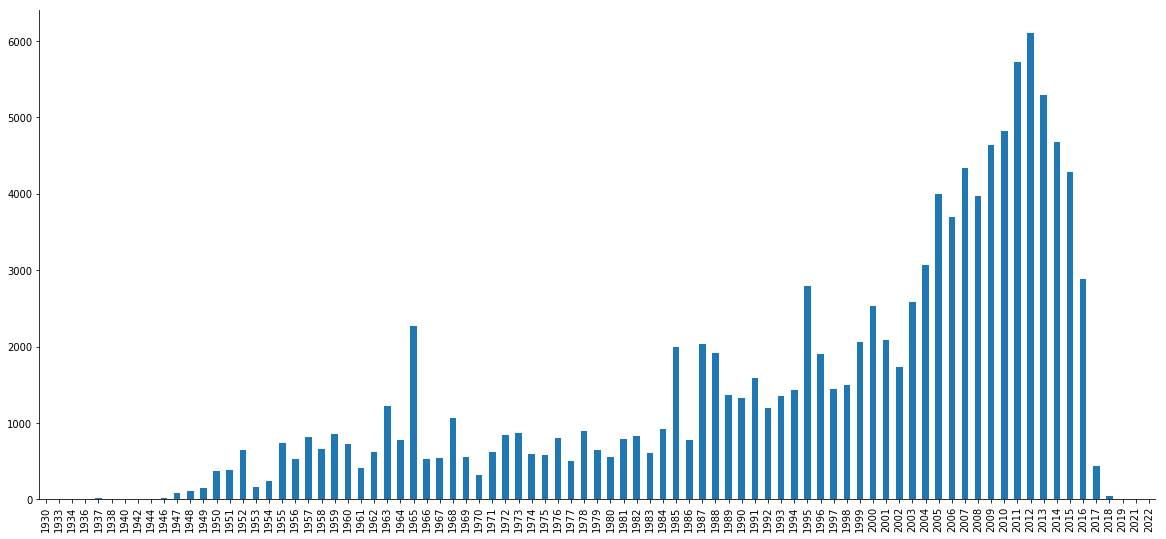

In [238]:
# plot by year
plt.figure(figsize = (20,9))
data.year.value_counts().sort_index().plot.bar()
sns.despine()

In [210]:
!pip install langdetect

    100% |████████████████████████████████| 1.0MB 1.0MB/s 
  Running setup.py bdist_wheel for langdetect ... done
  Stored in directory: /gpfs01/home/ggayq/.cache/pip/wheels/6f/8c/3b/ffa8151e27effd7de2a7d3194650d78fe6e4d4a3c175a74867
Successfully built langdetect


In [211]:
# only english
from langdetect import detect

In [214]:
print(detect("My name is Andreas Steffen"))

en


In [215]:
print(detect("Ich heisse Andreas Steffen"))

de


In [ ]:
# show for top 100

In [226]:
# do for all takes to long
#data['language'] = [detect(plot) for plot in data['plot'].tolist()]

In [225]:
# read in language 
data.to_csv('../data/movies_genres.with_year_lang.tsv', sep = '\t')

In [227]:
# show stats
data.language.value_counts()

en    116269
nl       120
de        14
it         6
da         5
es         2
no         2
fr         2
pt         2
hu         1
sl         1
ca         1
sv         1
Name: language, dtype: int64

In [237]:
# check some languages
data.query("language == 'fr'")['plot'].tolist()

[' Frankreich während des ersten Weltkrieges: Im Militärhospital Besancon hält sich Krankenschwester Véronique d\'Hergemont (Claude Jade) seit 14 Jahren vor ihrem verhaßten Ehemann Vorski versteckt. Die Nachricht von seinem Tod und das Auftauchen ihrer Initialen in einem Stummfilm führen Véronique auf eine geheimnisvolle Insel, die von Geistern und Druiden beherrscht scheint. Grausame Prophezeiungen von einem Massaker an dreißig Menschen erfüllen sich und Véronique stellt sich einem scheinbar aussichtslosen Kampf... Das phantastische Abenteuer, das erst 1996 seine deutsche Erstausstrahlung hatte, basiert auf dem Roman "Die Insel der dreißig Särge" von Maurice Leblanc. Deutscher Titel: "DIE INSEL DER DREISSIG TODE". L\'histoire se passe en 1917, en pleine guerre mondiale. Véronique (Claude Jade) est une jeune femme de 35 ans, infirmière à l\'hôpital militaire de Besançon. Elle apprend soudain l\'assassinat de son mari, le mystérieux Comte Vorski, qu\'elle n\'a pas vu depuis quatorze ans

In [241]:
data = data.query("language == 'en'")

In [249]:
# get genres
genres = data.filter(regex = "[A-Z]", axis = 1).columns.tolist()

In [250]:
genres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Lifestyle',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

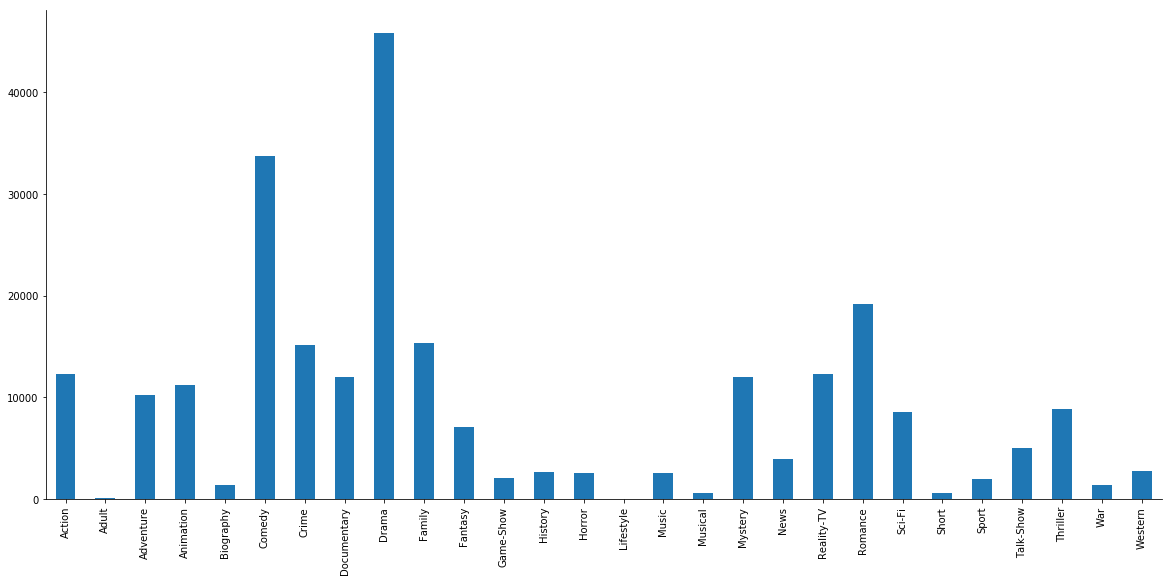

In [260]:
# plot genre occurence
plt.figure(figsize = (20,9))
data[genres].sum().plot.bar()
sns.despine()

In [269]:
# melt the data
data_melt = pd.melt(data,id_vars = ['title', 'plot'],value_vars = genre, var_name = 'genre')

In [270]:
# remove zeros
data_melt = data_melt[data_melt.value!=0]

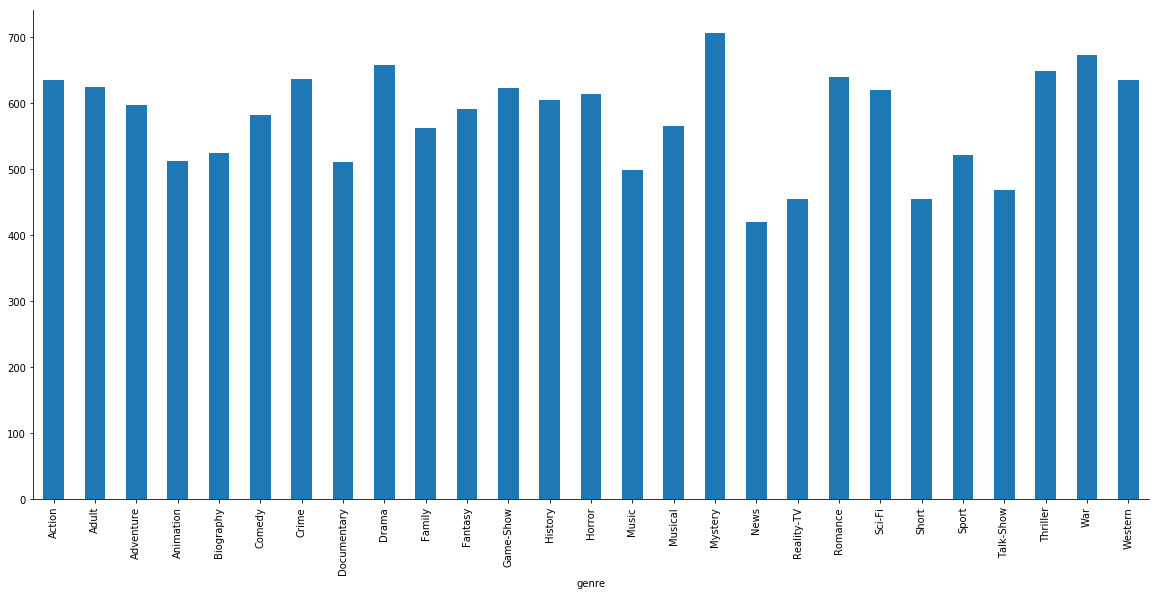

In [271]:
# calculate average number of chars in plot description and plot
plt.figure(figsize = (20,9))
data_melt.groupby('genre').apply(lambda x: x['plot'].str.len().mean()).plot.bar()
sns.despine()

In [272]:
data_melt['plot_string_len'] = data_melt['plot'].str.len()

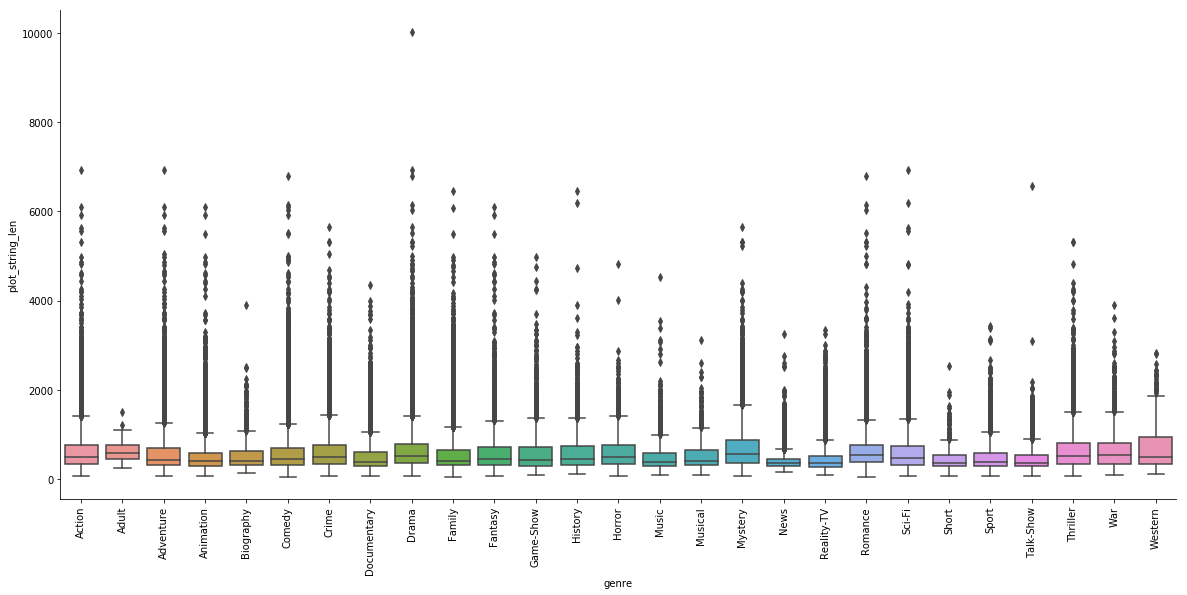

In [282]:
# but let's use a boxplot --> better to see the distributions
plt.figure(figsize=(20,9))
sns.boxplot(data = data_melt, x= 'genre', y= 'plot_string_len')
plt.xticks(rotation = 90)
sns.despine()

In [281]:
# inspect strongst outlier
data_melt.sort_values('plot_string_len', ascending = False).head(1)['plot'].values